# Introduction

Chennai house sale price data is used by forcasting websites to pridict the price of the property.

Real estate transactions data has to analysed to find the solutions for the problems faced by buyers and sellers.


## Problem Statement

* Create sales price forcasting model for newbies to find the fair price of the property in Chennai.
* Give insights to sellers as to how to build homes that fetch them more money.
* Analys the the important factors that contribute towards the price.
* Forcast the permissible range of values for negotiation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [2]:
data=pd.read_csv(r"train-chennai-sale.csv")

In [3]:
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [4]:
data.shape

(7109, 22)


* This data consists of 22 features of the property and 7109 Real estate transactions

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# Dataset Features:

* AREA: Loaction of the Property in Chennai
* INT_SQFT: Property size in Sq.ft
* DATE_SALE: Sales date of the property
* DIST_MAINROAD: Distance of property to the Main Road
* N_BEDROOM: No of Bedrooms in the Property
* N_BATHROOM: No of Bedrooms in the Property
* N_ROOM: No of Rooms in the Property      
* SALE_COND: Sold condition for the Property
* PARK_FACIL: Parking Facility of the Property
* DATE_BUILT: Year of Build
* BUILDTYPE: Purpose of the Property
* UTILITY_AVAIL: Servises Available at ehe property
* STREET: Type of street
* MZZONE: Type of area (i.e A: Agricultural, I: Industrial , C: Commercial , RL,RM,RH- Rural Density LOw, Medium and High.
* REG_FEE: Registration fee of the property
* COMMIS : commission earned for selling the property 
* SALES_PRICE : Selling price of the property


QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL are the masked data in the dataset.
   

# Data Cleaning

In [6]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

* There are missing values in N_BEDROOM,N_BATHROOM,QS_OVERALL

In [7]:
# Filling the null values with mode and mean()

data["N_BEDROOM"]=data["N_BEDROOM"].fillna(data["N_BEDROOM"].mode()[0])
data["N_BATHROOM"]=data["N_BATHROOM"].fillna(data["N_BATHROOM"].mode()[0])
data["QS_OVERALL"]=data["QS_OVERALL"].fillna(data["QS_OVERALL"].mean())

In [8]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

* missing values are filled with mean and mode.

In [9]:
# Dropping unwanted columns
data=data.drop(["PRT_ID","REG_FEE","COMMIS"],axis=1)

* Reg_Fee and Commission is known at the time of sales only.

In [10]:
# Creating a new data
data1=data[:]

In [11]:
correct_area={"Chrompt":"Chrompet","Chrmpet":"Chrompet","Chormpet":"Chrompet","TNagar":"T Nagar",
              "Karapakam":"Karapakkam","KKNagar":"KK Nagar","Velchery":"Velachery",
              "Ana Nagar":"Anna Nagar","Ann Nagar":"Anna Nagar","Adyr":"Adyar"}
Typo_error={"Adj Land":"AdjLand","Ab Normal":"AbNormal","Partiall":"Partial","PartiaLl":"Partial",
           "Noo":"No","Other":"Others","Comercial":"Commercial","All Pub":"AllPub","NoSewr ": "NoSewr" ,
            "Pavd":"Paved","NoAccess":"No Access"}

data1["AREA"]=data1["AREA"].replace(correct_area)
data1['SALE_COND']=data1['SALE_COND'].replace(Typo_error)
data1['PARK_FACIL']=data1['PARK_FACIL'].replace(Typo_error)
data1['BUILDTYPE']=data1['BUILDTYPE'].replace(Typo_error)
data1['UTILITY_AVAIL']=data1['UTILITY_AVAIL'].replace(Typo_error)
data1['STREET']=data1['STREET'].replace(Typo_error)

* **Correcting the misspelled data**

In [12]:
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [13]:
# converting 'DATE_SALE' to date format. 

data1["DATE_SALE"] = pd.to_datetime(data1["DATE_SALE"])
data1["DATE_BUILD"] = pd.to_datetime(data1["DATE_BUILD"])

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   float64       
 5   N_BATHROOM     7109 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   datetime64[ns]
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [15]:
# Converting N_BEDROOM,N_BATHROOM the datatypes from float into int datatype

data1['N_BEDROOM'] = data1['N_BEDROOM'].astype(int)
data1['N_BATHROOM'] = data1['N_BATHROOM'].astype(int)

In [16]:
# calculating the age of the building

data1['building_age'] = (pd.DatetimeIndex(data1['DATE_SALE']).year) - (pd.DatetimeIndex(data1['DATE_BUILD']).year)


* As we have calculated age of the building from the date sale and date build, we can drop the DATE_SALE and DATE_BUILD features

In [17]:
data1=data1.drop(['DATE_SALE','DATE_BUILD'],axis=1)

In [18]:
data1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,building_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,32


In [19]:
# Catagorical Features

Catagorical_Features=[]
for i in data1.columns:
    if data1[i].dtype == np.object:
        Catagorical_Features.append(i)
        

**There are 7 categorical variables available**
* AREA
* SALE_COND
* PARK_FACIL
* BUILDTYPE
* UTILITY_AVAIL
* STREET
* MZZONE

In [20]:
data1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'building_age'],
      dtype='object')

# Data Visualisation

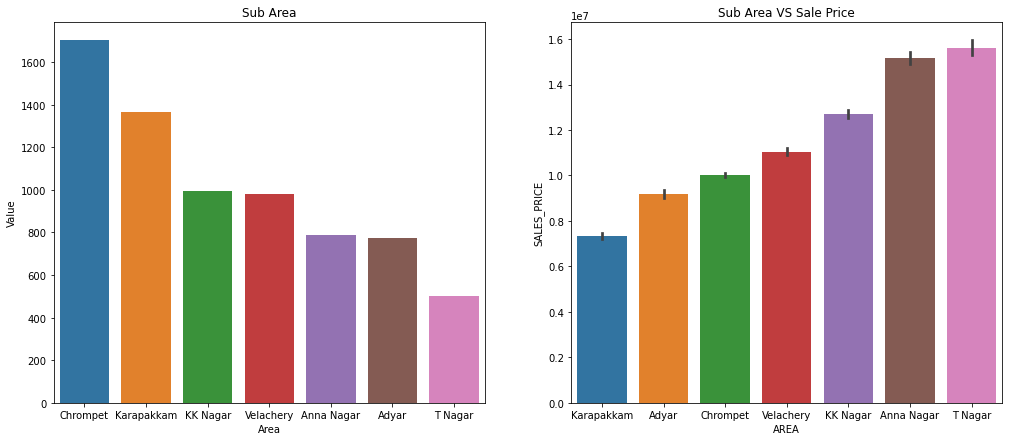

In [21]:
# Area Subplot

plt.figure(figsize=(17,7))
area=data1['AREA'].value_counts()

plt.subplot(1,2,1)
sns.barplot(x=area.index,y=area.values,data=data1)
plt.xlabel("Area")
plt.ylabel("Value")
plt.title('Sub Area')


plt.subplot(1,2,2)
sns.barplot(x='AREA',y='SALES_PRICE',data=data1,
            order= data1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["AREA"])
plt.title('Sub Area VS Sale Price')
plt.show()


* **T nagar and Anna nagar areas has higher selling price**

* Eventhough most properties in chrompet got sold, the individual property value is less

* Karapakkam has less selling price

### Size of the property

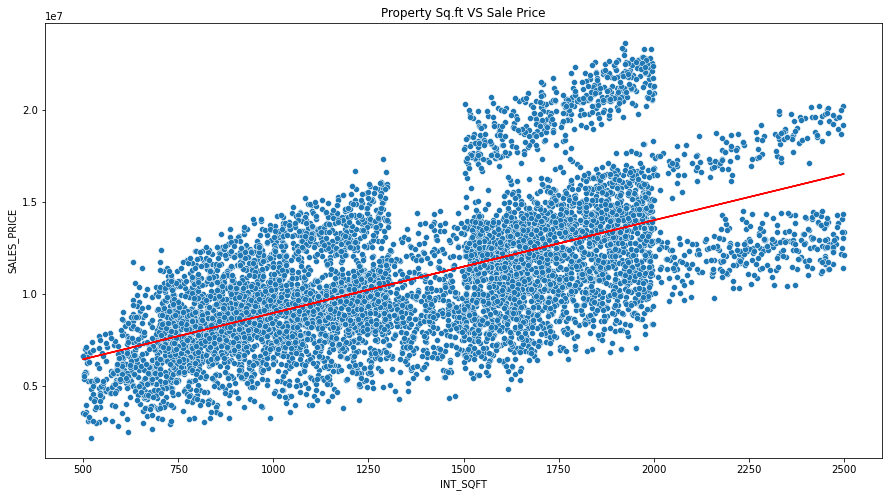

In [22]:
# INT_SQFT Subplot

plt.figure(figsize=(15,8))

x=data1['INT_SQFT']
y=data1['SALES_PRICE']
sns.scatterplot(x='INT_SQFT',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('Property Sq.ft VS Sale Price')

plt.show()


* Selling price is influenced positively by the Sq.ft of the property.

* It follows linear regression.

* It is an important feature in sale price prediction

### Distance from Main Road

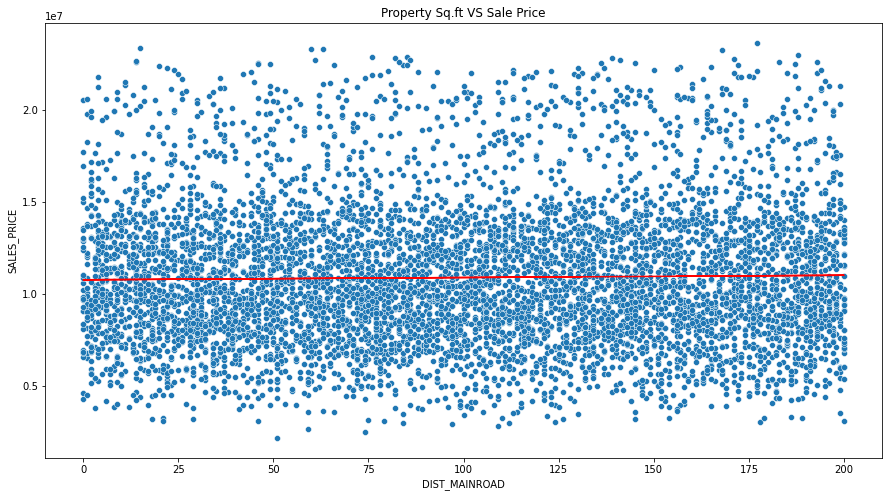

In [23]:
# DIST_MAINROAD Subplot

plt.figure(figsize=(15,8))

x=data1['DIST_MAINROAD']
y=data1['SALES_PRICE']
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('Property Sq.ft VS Sale Price')

plt.show()




* Distance to main road has no direct relationship with the selling price.

* As chennai is well connected with the road and transport this feature has little bit of importance

* **DIST_MAINROAD can be dropped from the data.**

### No of Bedroom

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64


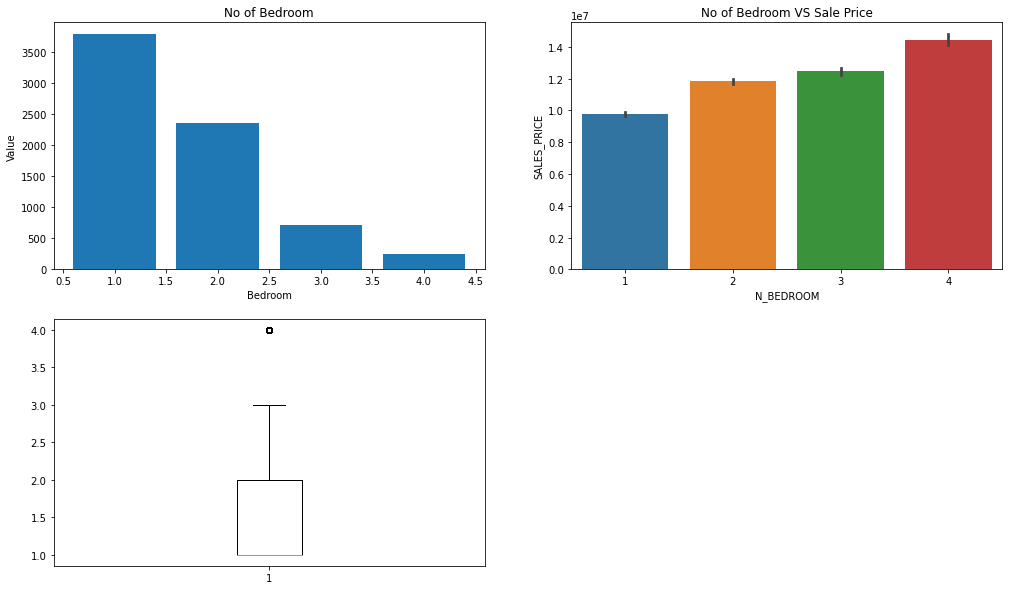

In [24]:
plt.figure(figsize=(17,10))
Bedroom=data1['N_BEDROOM'].value_counts()

plt.subplot(2,2,1)
plt.bar(Bedroom.index,Bedroom.values)
plt.xlabel("Bedroom")
plt.ylabel("Value")
plt.title('No of Bedroom')


plt.subplot(2,2,2)       
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=data1,
            order= data1.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["N_BEDROOM"])
plt.title('No of Bedroom VS Sale Price')

plt.subplot(2,2,3)  
plt.boxplot(data1['N_BEDROOM'])   

print(data1['N_BEDROOM'].value_counts())

* Number of bathroom and selling price has linear relationship. it is an important feature.

* Even though 4 is shown as outlier, it is actualy feasible in real time.

* There is a linear relationship between No of Debroom and Sales Price.

### No of Bathrooms

1    5594
2    1515
Name: N_BATHROOM, dtype: int64


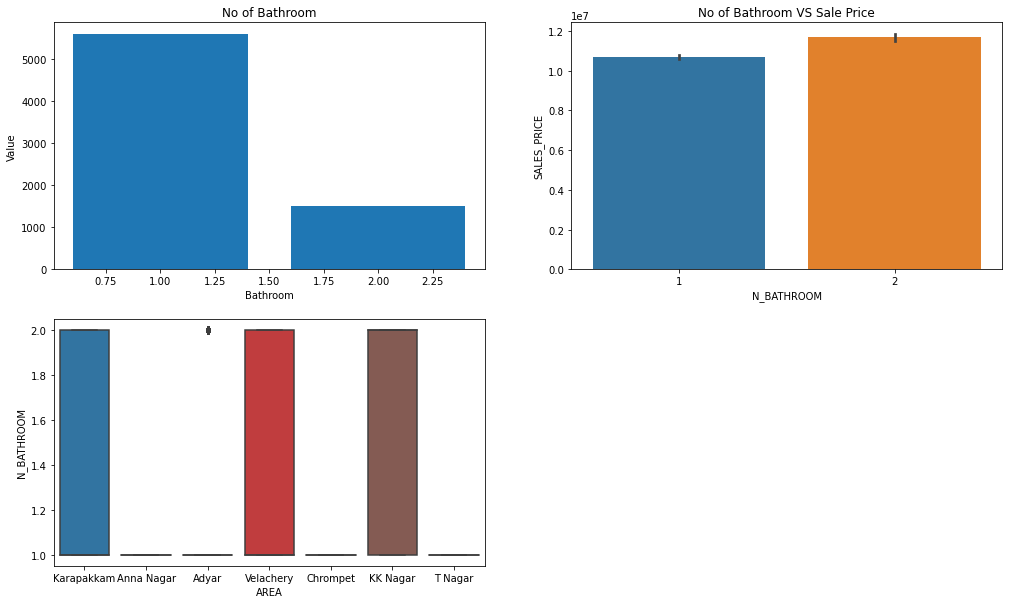

In [25]:
plt.figure(figsize=(17,10))



Bathroom=data1['N_BATHROOM'].value_counts()

plt.subplot(2,2,1)
plt.bar(Bathroom.index,Bathroom.values)
plt.xlabel("Bathroom")
plt.ylabel("Value")
plt.title('No of Bathroom')


plt.subplot(2,2,2)       
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=data1)
plt.title('No of Bathroom VS Sale Price')      

plt.subplot(2,2,3)
sns.boxplot(x='AREA', y='N_BATHROOM', data=data1)

print(data1['N_BATHROOM'].value_counts())

* There are 5594 properties with 1 bathrooms and 1515 with 2 bathrooms.

* Anna Nagar, Adyar , Chrompet and T nagar has 1 bathrooms 

* **There is a linear relationship between No of Bathroom and Sales Price.**

### No of Rooms

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64


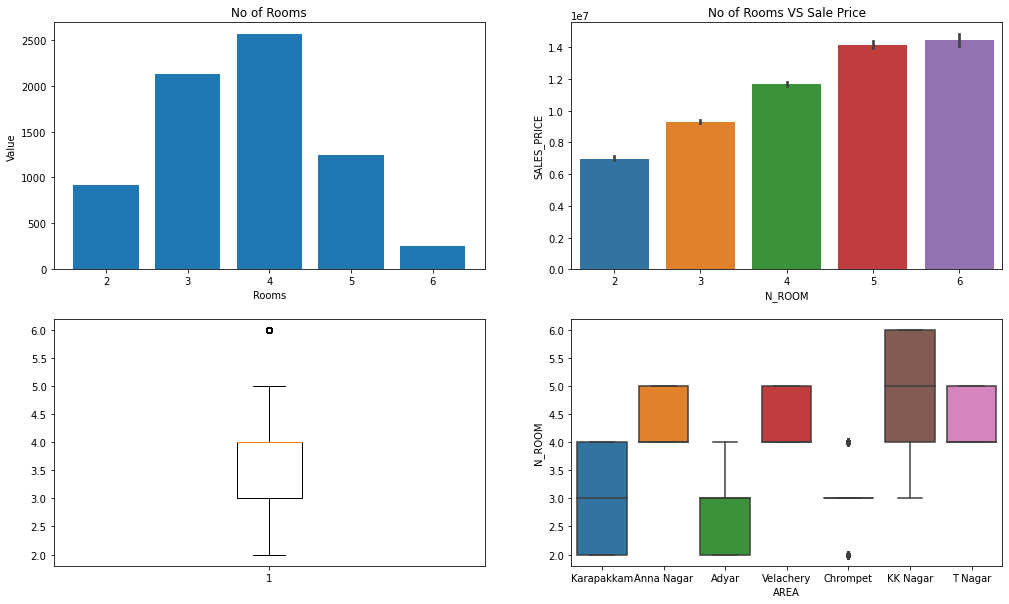

In [26]:
plt.figure(figsize=(17,10))
Rooms=data1['N_ROOM'].value_counts()

plt.subplot(2,2,1)
plt.bar(Rooms.index,Rooms.values)
plt.xlabel("Rooms")
plt.ylabel("Value")
plt.title('No of Rooms')


plt.subplot(2,2,2)       
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=data1)
plt.title('No of Rooms VS Sale Price')

plt.subplot(2,2,3)  
plt.boxplot(data1['N_ROOM'])    

plt.subplot(2,2,4)      
sns.boxplot(x='AREA', y='N_ROOM', data=data1)
#plt.show()

print(data1['N_ROOM'].value_counts())

* **KK Nagar has most no of rooms ( 4-6) and Adyar has an average of 2-3 rooms.**

* **No of rooms has direct linear relationship with sale price.**

* Eventhough 6 is shown as outlier, it is true that house might have 6 rooms

### Sale Condition

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64


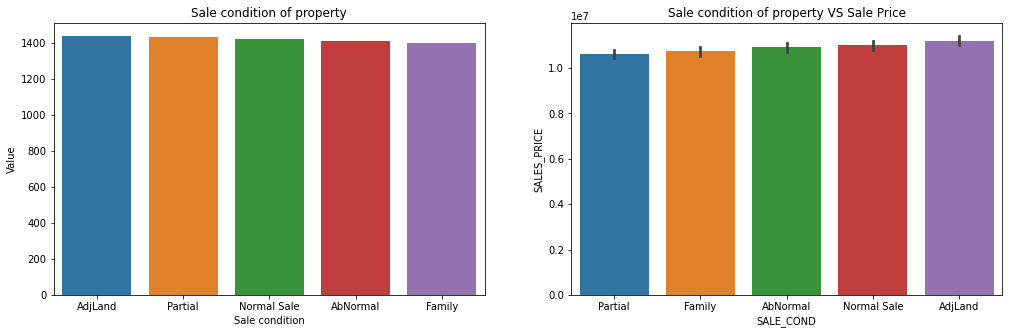

In [27]:
# SALE_COND Subplot

plt.figure(figsize=(17,5))
sale_condition=data1['SALE_COND'].value_counts()

plt.subplot(1,2,1)
sns.barplot(x=sale_condition.index,y=sale_condition.values,data=data1)
plt.xlabel("Sale condition")
plt.ylabel("Value")
plt.title('Sale condition of property')

plt.subplot(1,2,2)
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data1, 
            order= data1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])
plt.title('Sale condition of property VS Sale Price')


print(data1['SALE_COND'].value_counts())

* All the properties has similar selling price.

* **Properties with Adjacent lands has more sales price.**

### Parking Facility

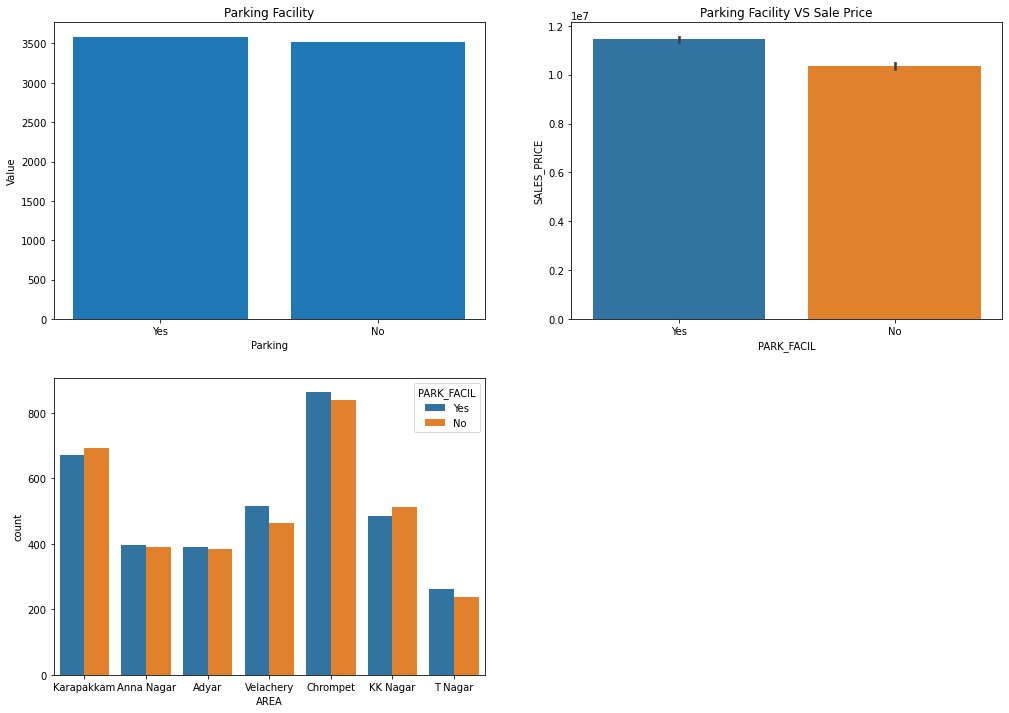

In [28]:
# PARK_FACIL Subplot

plt.figure(figsize=(17,12))
parking=data1['PARK_FACIL'].value_counts()

plt.subplot(2,2,1)
plt.bar(parking.index,parking.values)
plt.xlabel("Parking")
plt.ylabel("Value")
plt.title('Parking Facility')


plt.subplot(2,2,2)       
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=data1)
plt.title('Parking Facility VS Sale Price')


plt.subplot(2,2,3)
sns.countplot(x='AREA',hue='PARK_FACIL',data=data1)

plt.show()


* There is a linear relationship with parking facility and sales price, it is an important feature

* **Properties with both parking and as well as no parking  faclities has equal demand in the market.**


### Type of Building

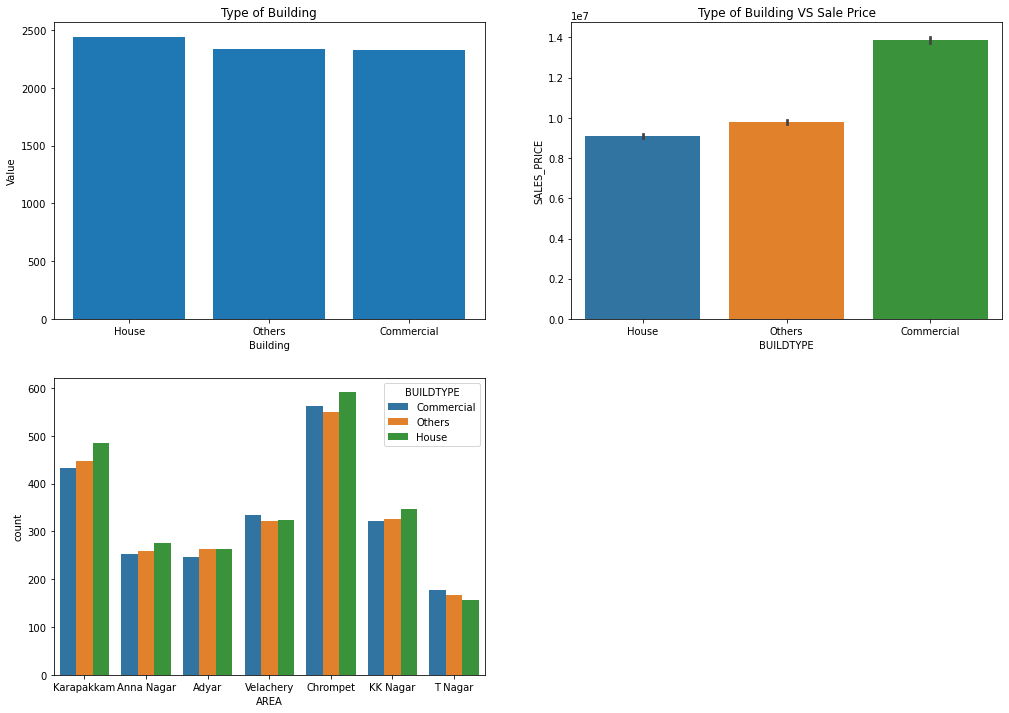

In [29]:
# BUILDTYPE Subplot

plt.figure(figsize=(17,12))
Building=data1['BUILDTYPE'].value_counts()

plt.subplot(2,2,1)
plt.bar(Building.index,Building.values)
plt.xlabel("Building")
plt.ylabel("Value")
plt.title('Type of Building')


plt.subplot(2,2,2)       
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data1,
            order= data1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["BUILDTYPE"])
plt.title('Type of Building VS Sale Price')

plt.subplot(2,2,3)
sns.countplot(x='AREA',hue='BUILDTYPE',data=data1)

plt.show()


* **Majarioty of T Nagar and Velachery properties sold are commercial properties.**

* Eventhough there is selling price difference we can not bale to find the linear relationship,
therefore we use **One hot Encoding.**

* Commercial Buildings has good sales value.


### Utility Availability

Text(0.5, 1.0, 'Utilities Availability VS Sale Price')

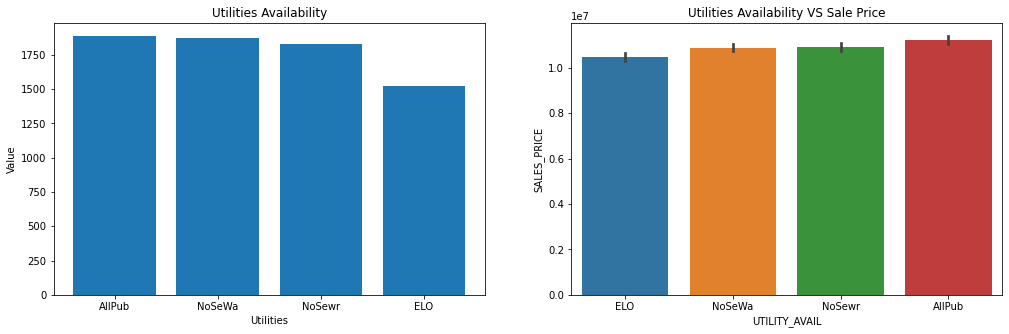

In [30]:
# UTILITY_AVAIL Subplot

plt.figure(figsize=(17,5))
Utilities=data1['UTILITY_AVAIL'].value_counts()

plt.subplot(1,2,1)
plt.bar(Utilities.index,Utilities.values)
plt.xlabel("Utilities")
plt.ylabel("Value")
plt.title('Utilities Availability')


plt.subplot(1,2,2)       
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data1,
            order= data1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])
plt.title('Utilities Availability VS Sale Price')

* **Properties with all facilities sold at a higher price.**

* There is a linear relationship with type of utilities available and sales price, it is an important feature.

### Type of Street

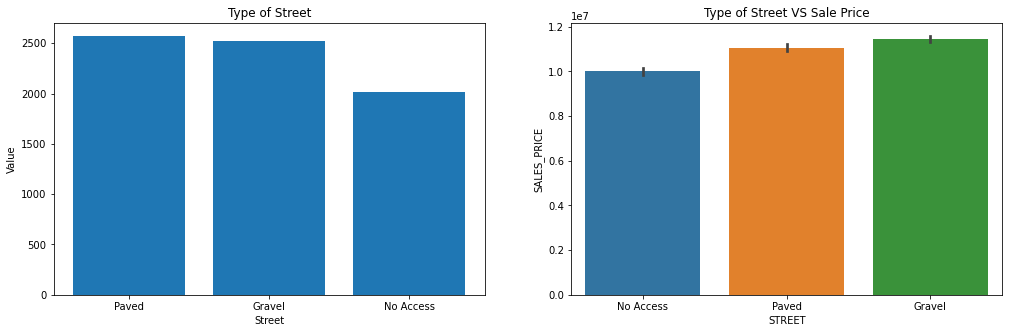

In [31]:
#sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(17,5))
street=data1['STREET'].value_counts()

plt.subplot(1,2,1)
plt.bar(street.index,street.values)
plt.xlabel("Street")
plt.ylabel("Value")
plt.title('Type of Street')


plt.subplot(1,2,2)       
sns.barplot(x='STREET',y='SALES_PRICE',data=data1,
            order= data1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["STREET"])
plt.title('Type of Street VS Sale Price')

plt.show()

* **Properties with gravel steet has more salling price.**

* There is a linear relationship with type of street and sales price, it is an important feature.

### Type of M_Zone

Text(0.5, 1.0, 'Type of Zone VS Sale Price')

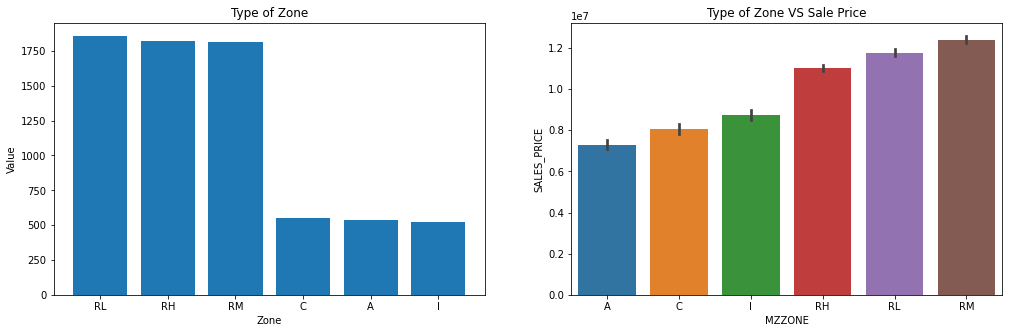

In [32]:
plt.figure(figsize=(17,5))
Zone=data1['MZZONE'].value_counts()

plt.subplot(1,2,1)
plt.bar(Zone.index,Zone.values)
plt.xlabel("Zone")
plt.ylabel("Value")
plt.title('Type of Zone')


plt.subplot(1,2,2)       
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data1, 
            order= data1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])
plt.title('Type of Zone VS Sale Price')

* Most properties are sold in Rural Low, High, Medium density zones.

* Rural property with medium density has good selling price.

* There is a linear relationship between chennai zone and salling price, it is an important feature.

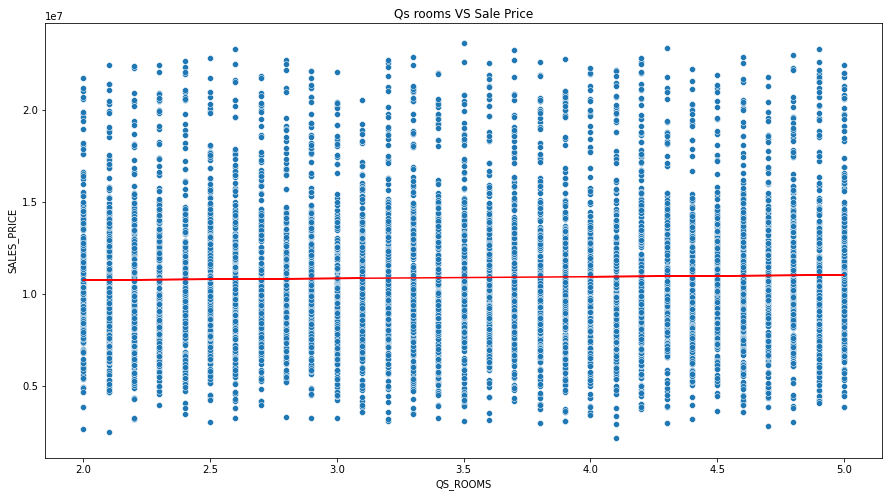

In [33]:
# QS_ROOMS Subplot

plt.figure(figsize=(15,8))

x=data1['QS_ROOMS']
y=data1['SALES_PRICE']
sns.scatterplot(x='QS_ROOMS',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('Qs rooms VS Sale Price')

plt.show()

* QS_ROOMS doesn't have any linear relationship with selling price, It is not a important feature in model building.

* QS_ROOMS can be dropped from data.

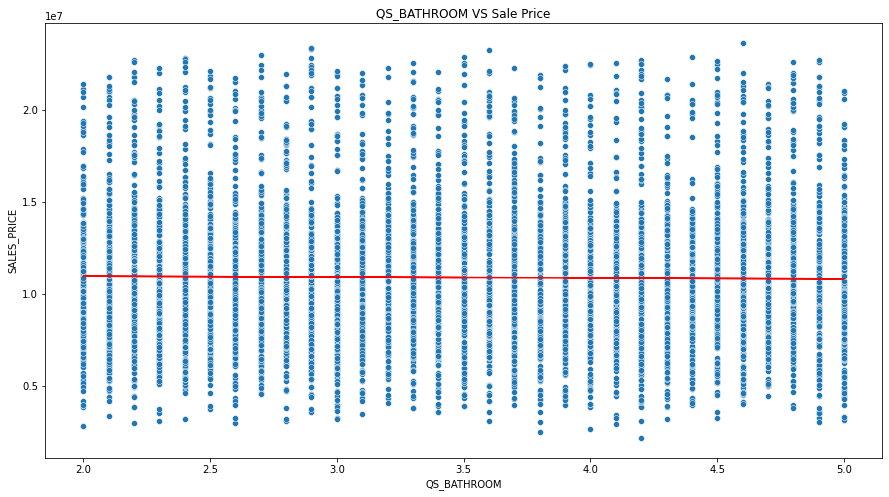

In [34]:
# QS_BATHROOM Subplot

plt.figure(figsize=(15,8))

x=data1['QS_BATHROOM']
y=data1['SALES_PRICE']
sns.scatterplot(x='QS_BATHROOM',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('QS_BATHROOM VS Sale Price')

plt.show()

* QS_BATHROOM doesn't have any linear relationship with selling price, It is not a important feature in model building.

* QS_BATHROOM can be dropped from the data

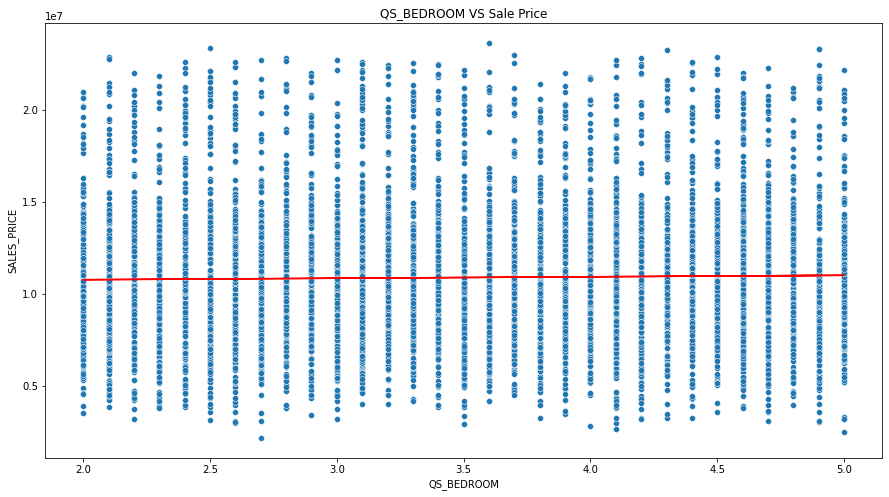

In [35]:
# QS_BEDROOM Subplot

plt.figure(figsize=(15,8))

x=data1['QS_BEDROOM']
y=data1['SALES_PRICE']
sns.scatterplot(x='QS_BEDROOM',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('QS_BEDROOM VS Sale Price')

plt.show()

* QS_BEDROOM doesn't have any linear relationship with selling price, It is not a important feature in model building.

* QS_ROOMS can be dropped from data.


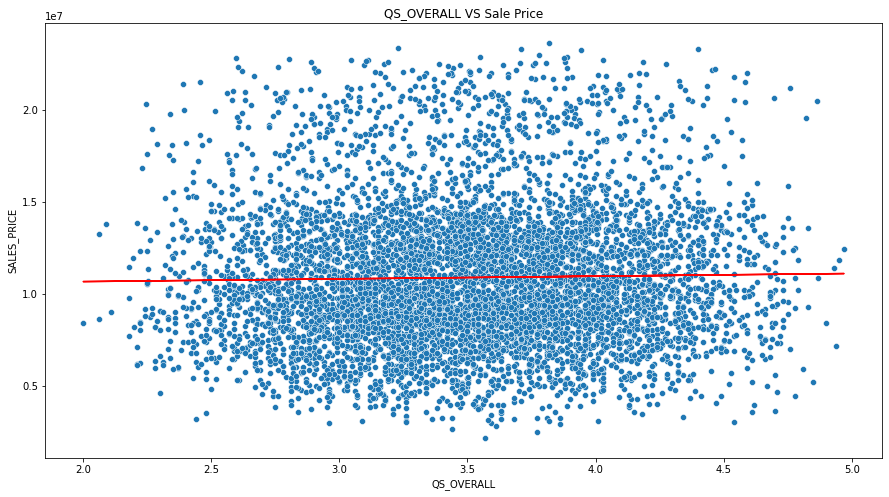

In [36]:
# QS_OVERALL Subplot

plt.figure(figsize=(15,8))

x=data1['QS_OVERALL']
y=data1['SALES_PRICE']
sns.scatterplot(x='QS_OVERALL',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('QS_OVERALL VS Sale Price')

plt.show()

* QS_OVERALL doesn't have any linear relationship with selling price, It is not a important feature in model building

* QS_OVERALL can be dropped from data.

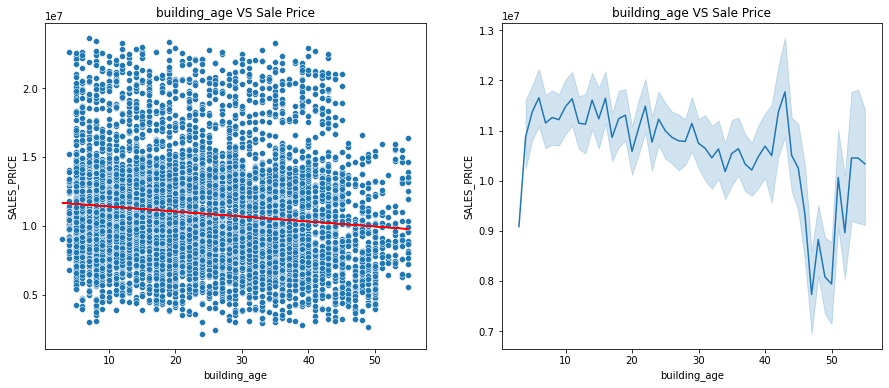

In [37]:
# QS_ROOMS Subplot

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
x=data1['building_age']
y=data1['SALES_PRICE']
sns.scatterplot(x='building_age',y='SALES_PRICE',data=data1)
m, c = np.polyfit(x, y, 1)
plt.plot(x, m*x+c,'red')
plt.title('building_age VS Sale Price')

plt.subplot(1,2,2)
sns.lineplot(x='building_age',y='SALES_PRICE',data=data1)
plt.title('building_age VS Sale Price')

plt.show()


* Age of the building having a linear relationship with the sellling price.

* More the age of the building lesser the sales price.


In [38]:
data1=data1.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

**Dropping features with no linear relationship from the data 
(i.e. 'DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL')**

# Encoding

In [39]:
# Ordinal Encoding

data1['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

* **since there is big difference between the top three and bottom three, We use ordinal Encoding.**

In [40]:
data1.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'building_age'],
      dtype='object')

In [41]:
data1['AREA'] = data1['AREA'].map({'Karapakkam':0,'Adyar':1,'Chrompet': 2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
data1['SALE_COND'] = data1['SALE_COND'].map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
data1['PARK_FACIL'] = data1['PARK_FACIL'].map({'No':0,'Yes':1})
data1['UTILITY_AVAIL'] = data1['UTILITY_AVAIL'].map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})
data1['STREET'] = data1['STREET'].map({'No Access':0,'Paved': 1,'Gravel': 2})
data1['MZZONE']=data1['MZZONE'].map({'I':0,'A':1,'C':2,'RM':4,'RH':5,'RL':6})
                                     

* **Encoding the data based on there importance.** 

In [42]:
data1=pd.get_dummies(data1,columns=["BUILDTYPE"])

* **since BUILDTYPE 

In [43]:
data1.head(10)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,building_age,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,2,1,3,1,1,7600000,44,1,0,0
1,5,1986,2,1,5,2,0,3,2,5,21717770,11,1,0,0
2,1,909,1,1,3,2,1,0,2,6,13159200,20,1,0,0
3,3,1855,3,2,5,1,0,2,1,0,9630290,22,0,0,1
4,0,1226,1,1,3,2,1,3,2,2,7406250,30,0,0,1
5,2,1220,2,1,4,0,0,1,0,5,12394750,5,1,0,0
6,2,1167,1,1,3,0,0,3,0,6,8488790,28,0,0,1
7,3,1847,3,2,5,1,0,3,2,4,16800250,10,1,0,0
8,2,771,1,1,2,4,0,2,1,4,8308970,34,0,0,1
9,3,1635,2,1,4,2,0,0,0,0,8083650,15,0,0,1


# CORRELATION 

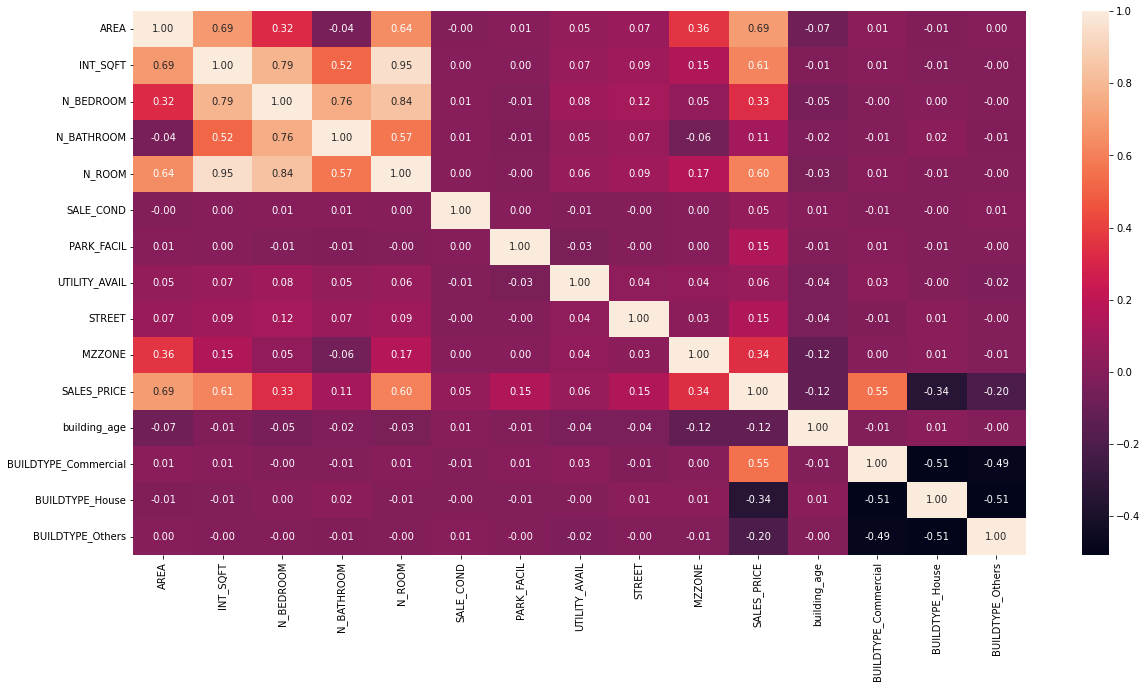

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(),annot=True,fmt='.2f')
plt.show()

* **Corelation of features of the property with sales price**
* AREA, INT_SQFT and BUILDTYPE is well corelated with sales price.

# Machine Learning Models

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
x=data1.drop('SALES_PRICE',axis=1)
y=data1['SALES_PRICE']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=7)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(5687, 14) (1422, 14) (5687,) (1422,)


In [48]:
x_train

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,building_age,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
6136,3,1852,3,2,5,3,0,2,0,0,45,0,1,0
2345,2,785,1,1,2,2,0,0,0,4,33,0,0,1
4112,2,898,1,1,3,3,0,0,1,5,29,0,1,0
649,1,1152,1,1,3,4,1,1,0,1,10,0,0,1
6735,0,624,1,1,2,1,1,0,1,6,49,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5699,0,639,1,1,2,2,0,2,2,5,27,1,0,0
2550,4,1847,3,2,5,0,1,2,2,6,26,0,0,1
537,3,1712,2,1,4,4,1,0,1,6,18,1,0,0
1220,4,1916,3,2,5,1,0,3,2,5,23,0,0,1


# scaling

In [49]:
from sklearn.preprocessing import StandardScaler
sscaler=StandardScaler()

sscaler.fit(x_train, y_train)
scaled_x_train = sscaler.transform(x_train)
scaled_x_test  = sscaler.transform(x_test)


# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()

In [51]:
linear.fit(scaled_x_train,y_train)

LinearRegression()

In [52]:
y_pred_linear=linear.predict(scaled_x_test)

In [53]:
from sklearn.metrics import r2_score

print("R2 score for linear regression is :",r2_score(y_test,y_pred_linear))


R2 score for linear regression is : 0.8883007586631344


In [54]:
df_linear = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_linear})
df_linear.head().reset_index(drop=True)

,Actual,Predicted
0,13122040,1.228118e+07
1,13729040,1.259506e+07
2,8469580,8.691048e+06
3,8350550,8.196112e+06
4,13926830,1.197466e+07


* **Linear Regression Model predicts the selling price of the property with 88.8% accuracy.**

# XGBoost

In [55]:
import xgboost as xgb
from xgboost import XGBRegressor

In [56]:
xg_scores=[]

for i in [0.1,0.13,0.15,0.17,0.19,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]:
    
    cv_xg=xgb.XGBRegressor(learning_rate=i, n_estimators =100, verbosity=0)
    
    score=cross_val_score(cv_xg,scaled_x_train, y_train,cv=10)
    
    xg_scores.append({'Learning rate' : i, 'Cross_val_Score': np.mean(score).round(5)})


In [57]:
xg_scores

[{'Learning rate': 0.1, 'Cross_val_Score': 0.98938},
 {'Learning rate': 0.13, 'Cross_val_Score': 0.9928},
 {'Learning rate': 0.15, 'Cross_val_Score': 0.99419},
 {'Learning rate': 0.17, 'Cross_val_Score': 0.99492},
 {'Learning rate': 0.19, 'Cross_val_Score': 0.99552},
 {'Learning rate': 0.2, 'Cross_val_Score': 0.99556},
 {'Learning rate': 0.3, 'Cross_val_Score': 0.99645},
 {'Learning rate': 0.4, 'Cross_val_Score': 0.99659},
 {'Learning rate': 0.5, 'Cross_val_Score': 0.9966},
 {'Learning rate': 0.6, 'Cross_val_Score': 0.99691},
 {'Learning rate': 0.7, 'Cross_val_Score': 0.99722},
 {'Learning rate': 0.8, 'Cross_val_Score': 0.99684},
 {'Learning rate': 0.9, 'Cross_val_Score': 0.99687},
 {'Learning rate': 1, 'Cross_val_Score': 0.99623},
 {'Learning rate': 1.5, 'Cross_val_Score': 0.97866},
 {'Learning rate': 2, 'Cross_val_Score': -4.10363}]

In [58]:
df_cv_xg=pd.DataFrame(xg_scores,columns=['Learning rate','Cross_val_Score'])
df_cv_xg.loc[df_cv_xg['Cross_val_Score'].idxmax()]

Learning rate      0.70000
Cross_val_Score    0.99722
Name: 10, dtype: float64

* **Learning rate 0.7 gives best results 0.997 in XGBoost Model**

In [59]:
# XGBoost Model 

model_xg = xgb.XGBRegressor(learning_rate=0.7, n_estimators =100, verbosity=0)

In [60]:
model_xg.fit(scaled_x_train,y_train)

XGBRegressor(learning_rate=0.7, verbosity=0)

In [61]:
y_pred_xg= model_xg.predict(scaled_x_test)
print("XGBoost Model Score:",round(r2_score(y_test,y_pred_xg),3))

XGBoost Model Score: 0.997


**XGBoost Model predicts the selling price of the property with 99.7% accuracy** 

In [62]:
df_XGboost = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xg})
df_XGboost.head()

,Actual,Predicted
131,13122040,13228074.0
1796,13729040,13719616.0
4285,8469580,8502372.0
3027,8350550,8352398.5
6410,13926830,13785672.0


# Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf_scores=[]
for i in range(1,100,4):
    cv_rf=RandomForestRegressor(max_depth=i, max_features = 'sqrt')
    score=cross_val_score(cv_rf,scaled_x_train, y_train,cv=10)
    rf_scores.append({'Depth' : i, 'Cross_val_Score': np.mean(score).round(5)})


In [64]:
rf_scores

[{'Depth': 1, 'Cross_val_Score': 0.40935},
 {'Depth': 5, 'Cross_val_Score': 0.9075},
 {'Depth': 9, 'Cross_val_Score': 0.97078},
 {'Depth': 13, 'Cross_val_Score': 0.98261},
 {'Depth': 17, 'Cross_val_Score': 0.98366},
 {'Depth': 21, 'Cross_val_Score': 0.98402},
 {'Depth': 25, 'Cross_val_Score': 0.98389},
 {'Depth': 29, 'Cross_val_Score': 0.98386},
 {'Depth': 33, 'Cross_val_Score': 0.98404},
 {'Depth': 37, 'Cross_val_Score': 0.98399},
 {'Depth': 41, 'Cross_val_Score': 0.984},
 {'Depth': 45, 'Cross_val_Score': 0.98398},
 {'Depth': 49, 'Cross_val_Score': 0.98381},
 {'Depth': 53, 'Cross_val_Score': 0.98402},
 {'Depth': 57, 'Cross_val_Score': 0.98388},
 {'Depth': 61, 'Cross_val_Score': 0.98378},
 {'Depth': 65, 'Cross_val_Score': 0.9838},
 {'Depth': 69, 'Cross_val_Score': 0.98374},
 {'Depth': 73, 'Cross_val_Score': 0.98393},
 {'Depth': 77, 'Cross_val_Score': 0.98394},
 {'Depth': 81, 'Cross_val_Score': 0.98386},
 {'Depth': 85, 'Cross_val_Score': 0.98392},
 {'Depth': 89, 'Cross_val_Score': 0.983

In [65]:
df_cv_rfr=pd.DataFrame(rf_scores,columns=['Depth','Cross_val_Score'])
df_cv_rfr=df_cv_rfr.sort_values(by='Cross_val_Score',ascending=False)

depth=df_cv_rfr.iloc[0][0]
print("Maximum Deapth for Decision tree is:" ,df_cv_rfr.iloc[0][0])

Maximum Deapth for Decision tree is: 33.0


In [66]:
rfr=RandomForestRegressor(max_depth=int(depth), max_features = 'sqrt')

rfr.fit(scaled_x_train,y_train)

RandomForestRegressor(max_depth=33, max_features='sqrt')

In [67]:
y_pred_rfr=rfr.predict(scaled_x_test)

In [68]:
print("RandomForest model Rsquared score:",r2_score(y_test,y_pred_rfr))

RandomForest model Rsquared score: 0.9841333965642715


**Random Forest Model predicts the selling price of the property with 98.5% accuracy** 

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

scores=[]
for i in range(1,100,4):
    cv_dt=DecisionTreeRegressor(max_depth=i)
    score=cross_val_score(cv_dt,x_train, y_train,cv=10)
    scores.append((i,score.mean()))

In [70]:
df_cv_dt=pd.DataFrame(scores,columns=['Depth','CV_Score'])

In [71]:
df_cv_dt=df_cv_dt.sort_values(by='CV_Score',ascending=False)
df_cv_dt.reset_index(drop=True)

,Depth,CV_Score
0,17,0.971203
1,77,0.971189
2,33,0.971149
3,61,0.971145
4,37,0.971138
5,93,0.971136
6,45,0.971102
7,29,0.971095
8,97,0.971086
9,57,0.971062


In [72]:
depth=df_cv_dt.iloc[0][0]
print("Maximum Depth for Decision tree is:" ,df_cv_dt.iloc[0][0])

Maximum Depth for Decision tree is: 17.0


In [73]:
dt = DecisionTreeRegressor(max_depth=int(depth))
dt.fit(scaled_x_train, y_train)

DecisionTreeRegressor(max_depth=17)

In [74]:
y_pred_dt = dt.predict(scaled_x_test)

In [75]:
print("Decision Tree model Rsquared score:",metrics.r2_score(y_test, y_pred_dt))

Decision Tree model Rsquared score: 0.9728010331307869


**Decision Tree Model predicts the selling price of the property with 97.2% accuracy** 

# Sales Price Range Prediction

In [76]:
sscaler=StandardScaler()

sscaler.fit(x_train, y_train)

StandardScaler()

In [77]:
test_scaled=sscaler.transform(x_test.head(10))

In [78]:
# Predicting the sales price of the properties using different models.

L1=linear.predict(test_scaled)
X1=model_xg.predict(test_scaled)
R1=rfr.predict(test_scaled)
D1=dt.predict(test_scaled)

In [85]:
df_models=pd.DataFrame({"Sale_Price":y_test.head(10),"XGBoost": X1,"Linear": L1,"Random_Forest":R1,"Decision_Tree":D1})


In [80]:
df_models["Min_Selling_Price"]=df_models["XGBoost"]-data['SALES_PRICE'].std()
df_models["Max_Selling_Price"]=df_models["XGBoost"]+data['SALES_PRICE'].std()
df_models.reset_index(drop=True)

,Sale_Price,XGBoost,Linear,Random_Forest,Decision_Tree,Min_Selling_Price,Max_Selling_Price
0,13122040,13228074.0,1.228118e+07,12929801.80,12964760.0,9459470.0,16996678.0
1,13729040,13719616.0,1.259506e+07,13344029.40,12863220.0,9951012.0,17488220.0
2,8469580,8502372.0,8.691048e+06,8347467.75,7929540.0,4733768.5,12270976.0
3,8350550,8352398.5,8.196112e+06,8661084.60,8936650.0,4583795.0,12121002.0
4,13926830,13785672.0,1.197466e+07,12387305.60,14046320.0,10017068.0,17554276.0
5,11351580,11402064.0,1.201121e+07,11587019.60,10846380.0,7633460.5,15170668.0
6,11780070,11502590.0,1.026962e+07,11145622.15,12115290.0,7733986.5,15271194.0
7,13138550,13134710.0,1.296481e+07,13261248.80,12795925.0,9366106.0,16903314.0
8,6956820,6874338.5,7.854955e+06,7725034.55,7061130.0,3105735.0,10642942.0
9,10514930,10833402.0,1.207336e+07,10889651.50,10829040.0,7064798.5,14602006.0


In [81]:
predict_sales_price=df_models[["Sale_Price","XGBoost","Min_Selling_Price","Max_Selling_Price"]]
predict_sales_price.columns=[["Sale_Price","Fair Price","Minimum range","Maximun range"]]
predict_sales_price.reset_index(drop=True)

,Sale_Price,Fair Price,Minimum range,Maximun range
0,13122040,13228074.0,9459470.0,16996678.0
1,13729040,13719616.0,9951012.0,17488220.0
2,8469580,8502372.0,4733768.5,12270976.0
3,8350550,8352398.5,4583795.0,12121002.0
4,13926830,13785672.0,10017068.0,17554276.0
5,11351580,11402064.0,7633460.5,15170668.0
6,11780070,11502590.0,7733986.5,15271194.0
7,13138550,13134710.0,9366106.0,16903314.0
8,6956820,6874338.5,3105735.0,10642942.0
9,10514930,10833402.0,7064798.5,14602006.0



* **Maximum and Minimum price for the property is used by buyers for property negotiation.**

### Feature Importance

In [82]:
Imp_Features=pd.DataFrame({"Features":x.columns,"Importance":model_xg.feature_importances_})
Imp_Features=Imp_Features.sort_values(by='Importance',ascending=False)
Imp_Features.reset_index(drop=True)

,Features,Importance
0,BUILDTYPE_Commercial,0.475199
1,AREA,0.304393
2,MZZONE,0.051529
3,PARK_FACIL,0.042499
4,INT_SQFT,0.031300
5,N_BATHROOM,0.025359
6,BUILDTYPE_House,0.020512
7,N_ROOM,0.016694
8,STREET,0.014414
9,N_BEDROOM,0.005693


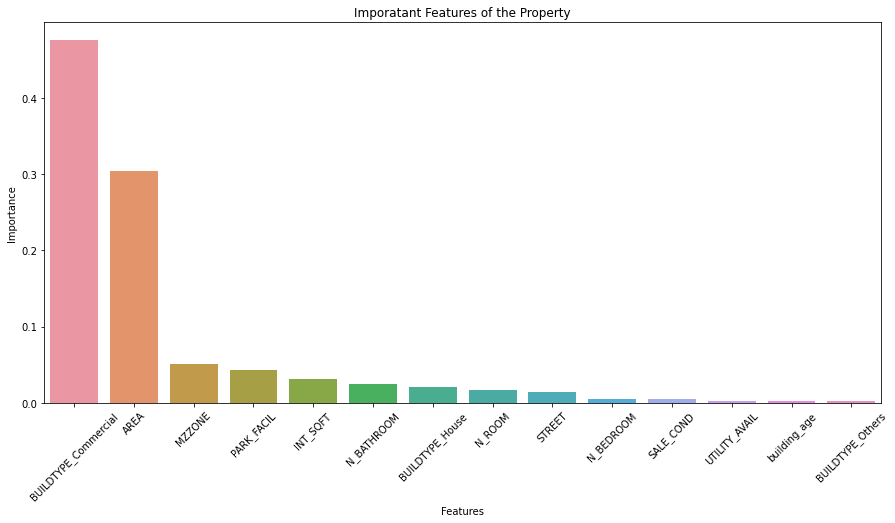

In [83]:
plt.figure(figsize=(15,7))
sns.barplot(x=Imp_Features['Features'],y=Imp_Features['Importance'])
plt.title("Imporatant Features of the Property")
plt.xticks(rotation = 45)
plt.show()

* **Commercial Building , Area influence the purchase of the property.**

# Conclusion

----------------------------------------------------
###  ML Model Accuracy

* XGBoost           : **99.7%**
* Random Forest     : **98.4%**
* Decision Tree     : **97.2%**
* Linear Regression : **88.6%**

---------------------------------------------------

* The Best Model for the given problem statement will be **XGBoost model with 99.7% Accuracy.**
* **Commercial Properties in T Nagar and Velachery** has good value in the market.
* **Commercial Building , Area** are the most important features of the properties